In [10]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import sklearn

In [11]:
df = pd.read_csv("Auto.csv")
origen_nombre = {1:"EEUU",2:"Alemania",3:"Japon"}
df["origin"] = df["origin"].map(origen_nombre)

In [12]:
df.drop(["name"], axis = 1, inplace = True)
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

In [13]:
df1 = pd.get_dummies(df,columns = ["origin"], drop_first = True)
df1.isnull().values.any()
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_EEUU,origin_Japon
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B90EDB5C0>,
      dtype=object)

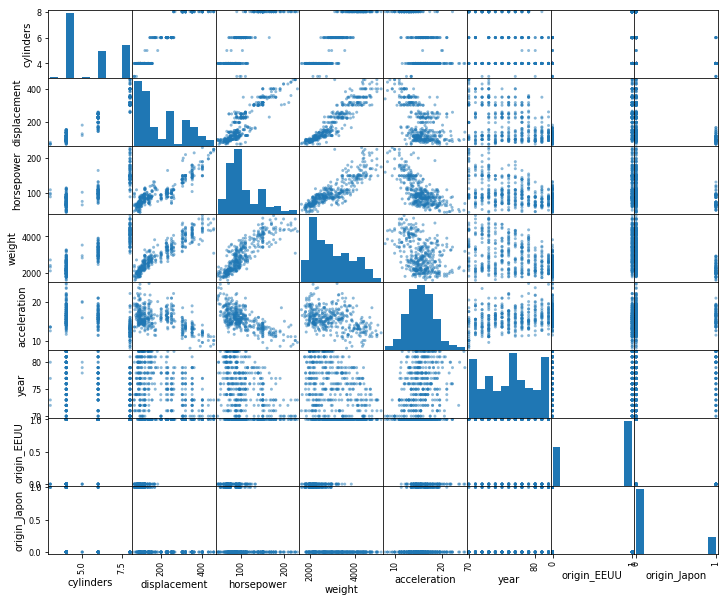

In [25]:
df1["horsepower"] = df1["horsepower"].astype(float)
x = df1.drop("mpg", axis = 1)
y = df1["mpg"]
pd.plotting.scatter_matrix(x, figsize= (12,10))

,cylinders,acceleration,year,origin_EEUU,origin_Japon
cylinders,1.000000,-0.504683,-0.345647,0.610494,-0.404209
acceleration,-0.504683,1.000000,0.290316,-0.258224,0.115020
year,-0.345647,0.290316,1.000000,-0.136065,0.199841
origin_EEUU,0.610494,-0.258224,-0.136065,1.000000,-0.648583
origin_Japon,-0.404209,0.115020,0.199841,-0.648583,1.000000


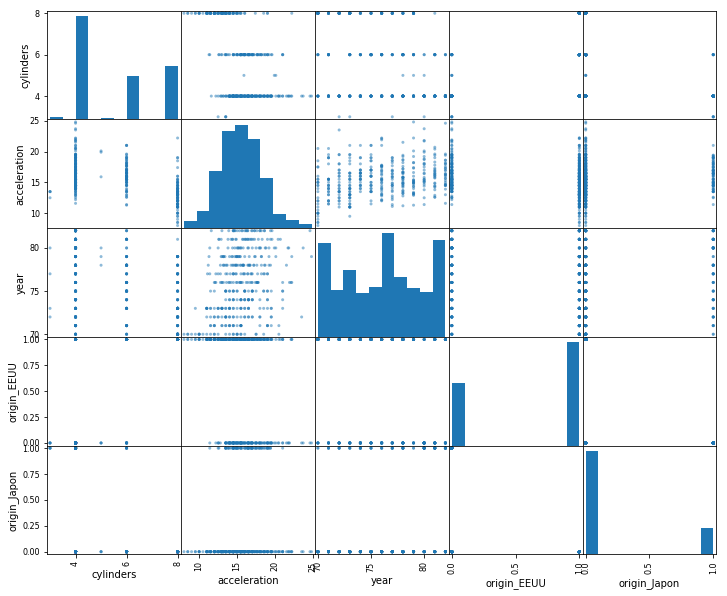

In [24]:
correlated_features = []
corr_matrix = x.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.append(colname)
x.drop(correlated_features, axis = 1, inplace = True)
corr_matrix


In [16]:
linear_regression = LinearRegression()
rfecv = RFECV(estimator = linear_regression, step = 1, scoring = "neg_mean_squared_error")
rfecv.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RFECV(cv='warn',
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [19]:
rfecv.support_

array([ True, False,  True,  True,  True])

In [17]:
model = rfecv.estimator_
model.predict(np.array([[8,70,1,0]]))

array([11.51524193])

In [18]:
rfecv.n_features_

4